In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace
# from scipy.ndimage import filters.laplace

import sys
sys.path.append('../')

from pathlib import Path
colour = Path('../GTA_images/Simple/Colour')
depth = Path('../GTA_images/Simple/Depth')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image,
    show_img, 
    show_array_of_images
)

from Equations import (
    symbol,
    equation
)

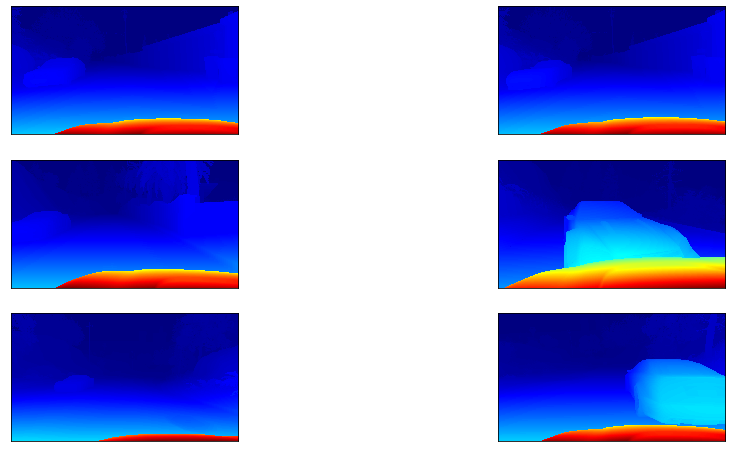

In [5]:
depth_images = [import_raw_depth_image(str(file)) for file in sorted(depth.iterdir())]

show_array_of_images(depth_images, depthmap=True, image_array_shape=(3,2))

# Absolute Depth Histogram

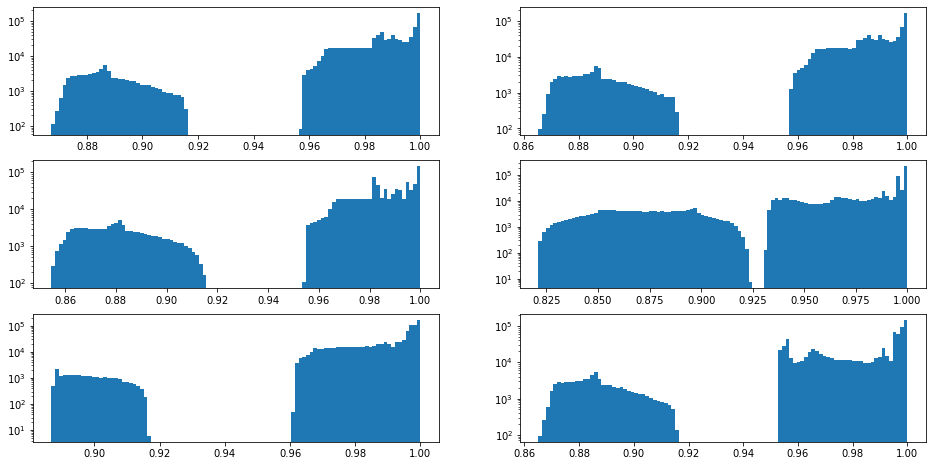

In [10]:
_, axis = plt.subplots(3,2,figsize=(16,8))

for i in range(len(depth_images)):
    axis[int(i/2)][i%2].hist(depth_images[i].flatten(), bins=100)
    axis[int(i/2)][i%2].set_yscale('log')
#     axis[int(i/2)][i%2].plot(laplace.fit(depths_6x8[i].flatten()))

pass;

# Relative Depth

In [11]:
depth_images[0].shape

(720, 1280)

In [14]:
relative_depths = [np.zeros((*depth_image.shape, 4)) for depth_image in depth_images]

for i,depth in enumerate(depth_images):
    for y in range(relative_depths[i].shape[0]):
        for x in range(relative_depths[i].shape[1]):
            if y-1>0:
                relative_depths[i][y,x,0] =  depth[y,x] - depth[y-1,x]
            if x+1<relative_depths[i].shape[1]:
                relative_depths[i][y,x,1] =  depth[y,x] - depth[y,x+1]
            if y+1<relative_depths[i].shape[0]:
                relative_depths[i][y,x,2] =  depth[y,x] - depth[y+1,x]
            if x-1>0:
                relative_depths[i][y,x,3] =  depth[y,x] - depth[y,x-1]

In [31]:
relative_histogram = np.histogram(relative_depths[0].flatten(), bins=101)

In [32]:
relative_histogram[0].shape
relative_histogram[1].shape

(101,)

(102,)

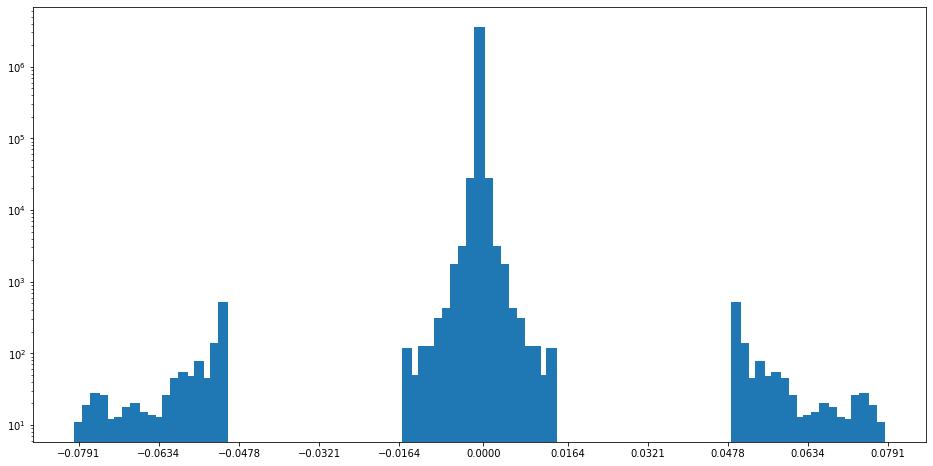

In [33]:
_, axis = plt.subplots(1,1, figsize=(16,8))

axis.bar(relative_histogram[1][:-1],relative_histogram[0],width=0.002)
axis.set_yscale('log')
axis.set_xticks(list(relative_histogram[1][:50:10])+[0]+list(relative_histogram[1][61::10]))
# axis.plot(relative_histogram[1][:-1], laplace.pdf(relative_histogram[1][:-1], loc=0, scale=1), 'r')
# axis.scatter(relative_histogram[1][:-1], relative_histogram[0])
# axis.set_ylim([1,10**5])
pass;

In [38]:
direction_histograms = [np.histogram(relative_depths[0][:,:,i].flatten(), bins=101) for i in range(4)]

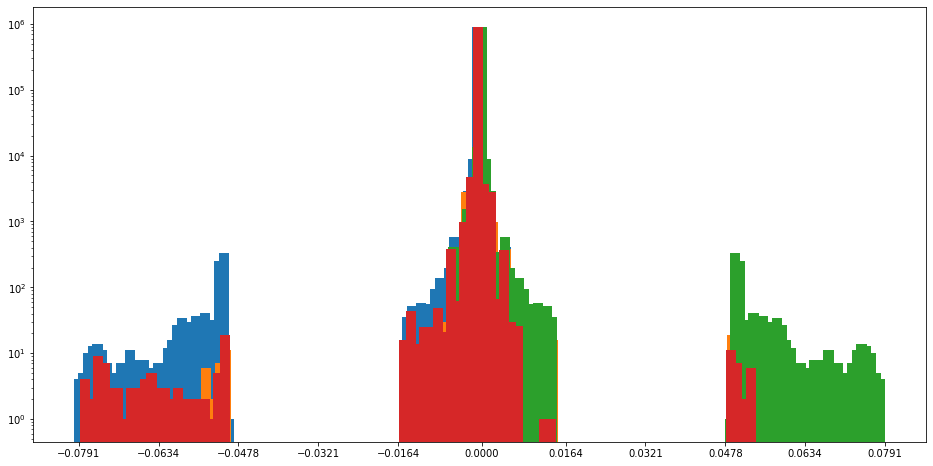

In [40]:
_, axis = plt.subplots(1,1, figsize=(16,8))

for i in range(len(direction_histograms)):
    axis.bar(direction_histograms[i][1][:-1],direction_histograms[i][0],width=0.002)
    axis.set_yscale('log')
    axis.set_xticks(list(relative_histogram[1][:50:10])+[0]+list(relative_histogram[1][61::10]))
# axis.plot(relative_histogram[1][:-1], laplace.pdf(relative_histogram[1][:-1], loc=0, scale=1), 'r')
# axis.scatter(relative_histogram[1][:-1], relative_histogram[0])
# axis.set_ylim([1,10**5])
pass;

In [35]:
focused_histogram = np.histogram(relative_depths[0][abs(relative_depths[0])<0.005].flatten(), bins=101)

In [36]:
list(focused_histogram[1][:50:10])+[0]+list(focused_histogram[1][61::10])

[-0.004999518394470215,
 -0.004009514752000865,
 -0.0030195111095315157,
 -0.0020295074670621666,
 -0.0010395038245928166,
 0,
 0.0010395038245928174,
 0.0020295074670621666,
 0.0030195111095315166,
 0.004009514752000865,
 0.004999518394470215]

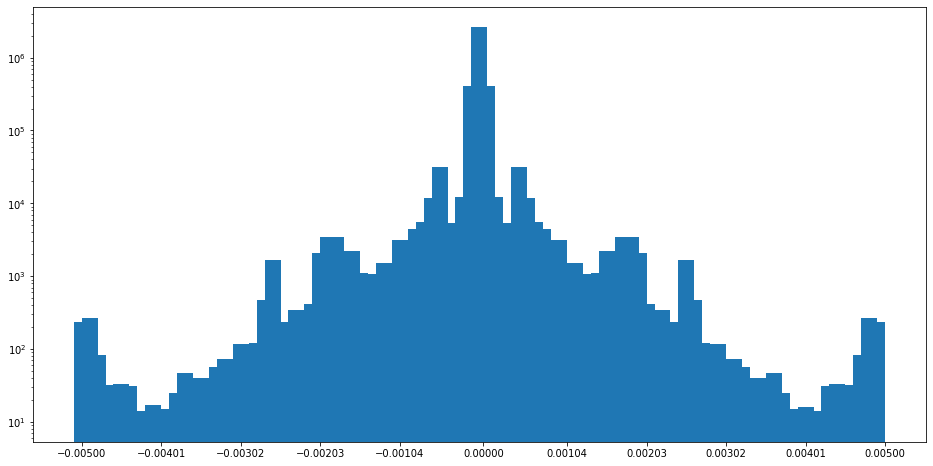

In [37]:
_, axis = plt.subplots(1,1, figsize=(16,8))

axis.bar(focused_histogram[1][:-1],focused_histogram[0],width=0.0002)
axis.set_yscale('log')
axis.set_xticks(list(focused_histogram[1][:50:10])+[0]+list(focused_histogram[1][61::10]))
# axis.plot(relative_histogram[1][:-1], laplace.pdf(relative_histogram[1][:-1], loc=0, scale=1), 'r')
# axis.scatter(relative_histogram[1][:-1], relative_histogram[0])
# axis.set_ylim([1,10**5])
pass;

# Standard Deviation